# <b><div style='padding:15px;background-color:#d8dcd6;color:#030aa7;font-size:120%;text-align: left'>Introduction</div></b>
## <b><div style='padding:15px;background-color:#d8dcd6;color:#030aa7;font-size:120%;text-align: left'>Import libriries </div></b>

In [137]:
import pandas as pd, numpy as np, seaborn as sns, warnings, os, sys, time, copy as cp, pickle,re
from datetime import datetime as dt
from matplotlib import pyplot as plt

import matplotlib.font_manager as fm
import matplotlib.patheffects as path_effects

import plotly.express as px
import plotly.graph_objects as go
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [138]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

## <b><div style='padding:15px;background-color:#d8dcd6;color:#030aa7;font-size:120%;text-align: left'>Outils du document</div></b>

In [139]:
sys.path.append(os.path.abspath('../../outils/'))
from prjFormation import palette

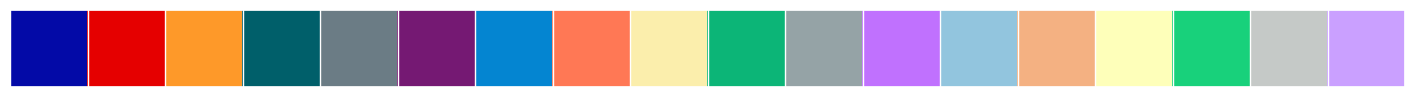

In [140]:
# palette = [ "#030aa7", "#e50000", "#d8863b", "#005f6a", "#6b7c85", "#751973", 
#             "#0485d1", "#ff7855", "#fbeeac", "#0cb577", "#95a3a6", "#c071fe", 
#             "#d1e5f0", "#fddbc7", "#ffffcb", "#12e193", "#d8dcd6", "#dfc5fe", 
#           ]
sns.palplot(sns.color_palette(palette[:18]))

In [141]:
from prjFormation import initProjet,affichageDonnees2d,affichageDonnees3d,createLinkageMatrix, afficheDendrogram, affichageDistribution,afficheColonneCible, add_median_labels, formatPct

In [142]:
from classificationBinaires import initDictionnaireClassificateurs, executionEssaiComparaisonClassificateurs,\
                                   affichageEvolutionMetriques, affichageROC, executeValidationCroisee,afficheSeparationsBinaires

In [143]:
font1 = fm.FontProperties(size=20)
font2 = fm.FontProperties(size=24)

warnings.filterwarnings(action="ignore")
sns.set_style('darkgrid')
sns.set(font_scale=2)

In [144]:
projet = initProjet(repertoireRacine='.',nomProjet='ClassificationDAlzheimer-Classification')

In [145]:
donnees = pd.read_csv('../../donnees/Alzheimer Disease/alzheimers_disease_data.csv')

cible = 'Diagnosis'
donnees.set_index('PatientID',inplace=True)

In [146]:
donnees.sample(5)

,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,SleepQuality,...,MemoryComplaints,BehavioralProblems,ADL,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness,Diagnosis,DoctorInCharge
PatientID,,,,,,,,,,,,,,,,,,,,,
5135,75,0,2,2,22.805839,0,7.688417,6.152978,8.306086,5.055943,...,0,1,8.681343,0,0,0,0,1,0,XXXConfid
6002,67,1,0,1,24.066063,1,10.846494,5.832994,5.501940,5.389245,...,0,0,7.789947,0,0,1,0,0,0,XXXConfid
5126,68,0,0,0,15.383391,0,15.453247,7.880195,9.757581,4.020211,...,0,1,8.699506,1,0,0,0,1,1,XXXConfid
6814,85,1,2,1,26.915401,0,3.918706,5.669646,0.587304,6.679697,...,0,0,8.228230,0,0,0,0,0,1,XXXConfid
6028,88,1,0,1,29.501617,0,6.374667,1.931548,0.034010,7.865662,...,0,0,2.873132,0,1,0,0,1,0,XXXConfid


In [147]:
for col in donnees.columns:
    print(f'{col:26s} {donnees[col].sort_values().nunique():4d} {donnees[col].sort_values().unique()}')

Age                          31 [60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83
 84 85 86 87 88 89 90]
Gender                        2 [0 1]
Ethnicity                     4 [0 1 2 3]
EducationLevel                4 [0 1 2 3]
BMI                        2149 [15.00885118 15.0120707  15.01465919 ... 39.98153263 39.98851283
 39.99276746]
Smoking                       2 [0 1]
AlcoholConsumption         2149 [2.00309914e-03 1.05044388e-02 1.87377280e-02 ... 1.99856215e+01
 1.99882913e+01 1.99892934e+01]
PhysicalActivity           2149 [3.61601683e-03 7.48259236e-03 9.34766153e-03 ... 9.98506885e+00
 9.98655393e+00 9.98742941e+00]
DietQuality                2149 [9.38472012e-03 1.26457316e-02 1.30556838e-02 ... 9.98028120e+00
 9.99720292e+00 9.99834568e+00]
SleepQuality               2149 [4.00262866 4.00417335 4.00617092 ... 9.99762727 9.9992013  9.99984032]
FamilyHistoryAlzheimers       2 [0 1]
CardiovascularDisease         2 [0 1]
Diabetes                      2 [0

## <b><div style='padding:15px;background-color:#d8dcd6;color:#030aa7;font-size:120%;text-align: left'>Effacement d'une variable inutile</div></b>

In [148]:
donnees.drop(columns=['DoctorInCharge'],inplace=True)

In [149]:
donnees.sample(5)

,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,SleepQuality,...,FunctionalAssessment,MemoryComplaints,BehavioralProblems,ADL,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness,Diagnosis
PatientID,,,,,,,,,,,,,,,,,,,,,
5153,76,0,3,3,37.248089,0,12.648325,2.549975,6.226853,4.551250,...,1.784411,0,1,5.284834,0,0,0,0,1,0
6682,70,1,0,1,34.934084,0,8.893063,8.754723,5.056105,7.080829,...,0.462700,0,0,6.132232,0,0,0,0,0,0
6161,76,0,3,3,24.972694,0,13.893641,3.442206,2.593831,4.043401,...,1.942846,0,1,6.411932,0,0,0,0,1,1
5311,71,1,0,0,33.367674,0,3.083614,2.820784,3.361159,5.564564,...,7.339194,0,0,5.940064,1,0,0,0,1,0
5774,69,0,0,2,20.611454,0,14.079511,2.895825,3.167207,7.605906,...,7.253109,0,0,6.303598,0,0,1,0,1,0


# <b><div style='padding:15px;background-color:#d8dcd6;color:#030aa7;font-size:120%;text-align: left'>Démarche pour constituer un modèle de classification </div></b>

<img src="https://raw.githubusercontent.com/rbizoi/MachineLearning/refs/heads/master/images/classification/demarche.png" width="800">


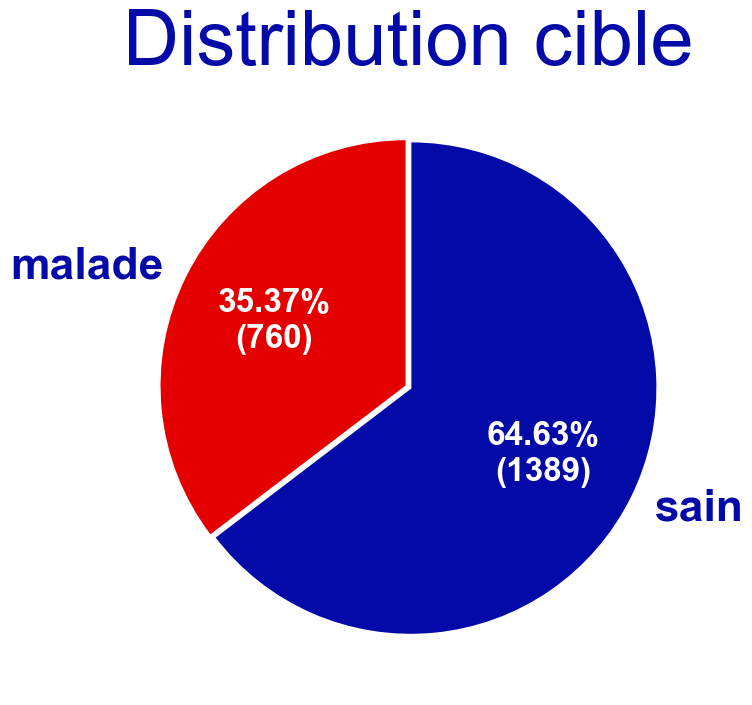

In [150]:
radius,size=0.8,0.3
fig,ax = plt.subplots(ncols=1,figsize=(8,8), subplot_kw=dict(aspect="equal"))

affichage = donnees.groupby(cible).AlcoholConsumption.count().reset_index().rename(columns={'AlcoholConsumption':'nombre'})
affichage['%'] = affichage.nombre * 100 / affichage.nombre.sum()
affichage

wedges, texts, autotexts =  ax.pie(
         affichage['nombre'],
         autopct=lambda pct: formatPct(pct, affichage.nombre.values),   # autopct='%1.2f%%', 
         labels=affichage[cible].map({1:'malade', 0:'sain'}).values,
         # shadow=True, 
         counterclock=False,
         startangle=90,
         colors = palette,
         # pctdistance=0.4, 
         labeldistance=1.1, 
         textprops=dict(color="#030aa7"),
         explode=[0.01 for _ in range(affichage[cible].count())]
      );
plt.setp(autotexts, size=24, weight="bold",color="w")
plt.setp(texts, size=32, weight="bold");
ax.set_title("Distribution cible",fontdict=dict(color="#030aa7", size=56));

# <b><div style='padding:15px;background-color:#d8dcd6;color:#030aa7;font-size:120%;text-align: left'>Centrage et réduction</div></b>


## Colonnes sans STD

In [151]:
masque = donnees.columns[donnees.nunique() == 2]
un_std_columns = donnees[masque]
un_std_columns.sample(5)

,Gender,Smoking,FamilyHistoryAlzheimers,CardiovascularDisease,Diabetes,Depression,HeadInjury,Hypertension,MemoryComplaints,BehavioralProblems,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness,Diagnosis
PatientID,,,,,,,,,,,,,,,,
6286,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
4803,1,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0
5247,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
5188,1,1,0,1,0,0,0,0,0,0,1,0,0,0,0,1
5112,1,0,0,0,1,1,0,1,0,0,0,0,0,0,1,0


## Drop binary column

In [152]:
std_donnees = donnees.drop(columns=un_std_columns.columns)

In [161]:
modelStd = StandardScaler()
modelStd.fit(std_donnees)

std_donnees[std_donnees.columns] = modelStd.transform(std_donnees)
std_donnees.sample(5)
donnees = pd.concat([std_donnees,un_std_columns],axis=1)
donnees.sample(5)

,Age,Ethnicity,EducationLevel,BMI,AlcoholConsumption,PhysicalActivity,DietQuality,SleepQuality,SystolicBP,DiastolicBP,...,HeadInjury,Hypertension,MemoryComplaints,BehavioralProblems,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness,Diagnosis
PatientID,,,,,,,,,,,,,,,,,,,,,
6110,-0.323626,-0.700408,0.788833,0.862133,0.196550,-0.488615,-0.371312,0.356475,-0.318570,1.486898,...,0,0,0,0,0,0,0,0,0,0
5636,1.233984,-0.700408,-1.422782,0.209289,-0.134848,0.421916,-1.381477,0.241311,-1.050936,0.236074,...,0,0,0,0,0,0,0,0,1,0
4842,-0.434884,0.303713,0.788833,-1.194175,1.640570,1.103650,-1.381731,1.150091,-0.472753,1.259476,...,0,0,0,1,0,0,0,0,1,1
4837,1.345242,-0.700408,-1.422782,-0.922099,-1.291809,1.004367,-0.427030,-1.005556,-1.359301,-1.583307,...,0,0,1,0,0,0,1,0,0,0
6039,0.343921,-0.700408,-0.316974,-0.282287,-0.018245,-1.196094,0.253720,-0.031022,1.377435,0.292930,...,0,0,0,0,0,0,0,0,1,0


# <b><div style='padding:15px;background-color:#d8dcd6;color:#030aa7;font-size:120%;text-align: left'>Separation des données pour l'apprentissage</div></b>

<img src="https://raw.githubusercontent.com/rbizoi/MachineLearning/refs/heads/master/images/classification/echantillonTraitementValidation.png" width="800">

<div style='padding:15px;color:#030aa7;font-size:120%;text-align: left'>L'échantillon validation <b>1024</b> individus</div>

In [154]:
X = donnees.drop(columns=cible)
y = donnees[cible]

X_process, X_validation, y_process, y_validation = train_test_split(X, 
                                                     y, 
                                                     test_size=1024, 
                                                     random_state=0, 
                                                     stratify = y
                                                   ) 
X_process.shape, X_validation.shape

((1125, 32), (1024, 32))

# <b><div style='padding:15px;background-color:#d8dcd6;color:#030aa7;font-size:120%;text-align: left'>Separation des données pour l'apprentissage</div></b>

<img src="https://raw.githubusercontent.com/rbizoi/MachineLearning/refs/heads/master/images/classification/echantillonApprentissageTest.png" width="800">

<div style='padding:15px;color:#030aa7;font-size:120%;text-align: left'>L'échantillon validation <b>1024</b> individus</div>

In [155]:
X = X_process
y = y_process

X_train, X_test, y_train, y_test = train_test_split(X, 
                                                     y, 
                                                     test_size=1024/len(X), 
                                                     random_state=0, 
                                                     stratify = y
                                                   ) 
X_train.shape, X_test.shape

((101, 32), (1024, 32))

In [156]:
initDictionnaireClassificateurs(arbres=128)

{'Random_Forest': RandomForestClassifier(max_depth=6, max_features=3, min_samples_split=4,
                        n_estimators=128, n_jobs=-1),
 'AdaBoost': AdaBoostClassifier(n_estimators=128),
 'LightGBM': LGBMClassifier(min_child_samples=10, min_split_gain=0.01, n_estimators=128,
                num_leaves=20, reg_alpha=0.1, reg_lambda=20),
 'XGBoost': XGBClassifier(base_score=None, booster=None, callbacks=None,
               colsample_bylevel=None, colsample_bynode=None,
               colsample_bytree=None, device=None, early_stopping_rounds=None,
               enable_categorical=False, eval_metric='auc', feature_types=None,
               gamma=None, grow_policy=None, importance_type=None,
               interaction_constraints=None, learning_rate=None, max_bin=None,
               max_cat_threshold=None, max_cat_to_onehot=None,
               max_delta_step=None, max_depth=6, max_leaves=None,
               min_child_weight=None, missing=nan, monotone_constraints=None,
      

In [157]:
classificateursDict =  initDictionnaireClassificateurs(arbres=12)
classificateursDict.pop('LightGBM')
classificateursDict.pop('XGBoost')
classificateursDict.pop('Stochastic_GD')
classificateursDict.pop('QuadraticDiscriminant')

QuadraticDiscriminantAnalysis()

# Execution des valeurs encoder

In [158]:
for col in donnees.columns:
    print(f"\n{col} : {donnees[col].sort_values().unique()}")


Age : [60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83
 84 85 86 87 88 89 90]

Gender : [0 1]

Ethnicity : [0 1 2 3]

EducationLevel : [0 1 2 3]

BMI : [15.00885118 15.0120707  15.01465919 ... 39.98153263 39.98851283
 39.99276746]

Smoking : [0 1]

AlcoholConsumption : [2.00309914e-03 1.05044388e-02 1.87377280e-02 ... 1.99856215e+01
 1.99882913e+01 1.99892934e+01]

PhysicalActivity : [3.61601683e-03 7.48259236e-03 9.34766153e-03 ... 9.98506885e+00
 9.98655393e+00 9.98742941e+00]

DietQuality : [9.38472012e-03 1.26457316e-02 1.30556838e-02 ... 9.98028120e+00
 9.99720292e+00 9.99834568e+00]

SleepQuality : [4.00262866 4.00417335 4.00617092 ... 9.99762727 9.9992013  9.99984032]

FamilyHistoryAlzheimers : [0 1]

CardiovascularDisease : [0 1]

Diabetes : [0 1]

Depression : [0 1]

HeadInjury : [0 1]

Hypertension : [0 1]

SystolicBP : [ 90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122

In [159]:
def getCatDictionary(donnees):
    data = donnees.copy()
    for colonne in donnees.columns:
        data[colonne+'_num'] = pd.Categorical(donnees[colonne]).codes
    return data

#X_train_categoricalDonnes = getCatDictionary(X_train)

#X_test_categoricalDonnes = getCatDictionary(X_test)

y_train_categoricalDonnes = pd.Categorical(y_train).codes
y_test_categoricalDonnes = pd.Categorical(y_test).codes
#y_train_categoricalDonnes = getCatDictionary(y_train)
#y_test_categoricalDonnes = getCatDictionary(y_test)

#X_test_categoricalDonnes


AdaBoost               0.8369	--	Area under the ROC curve : 0.9058	--	Exécution  :.03s
GaussianNaiveBayes     0.7002	--	Area under the ROC curve : 0.7227	--	Exécution  :.01s
Gaussian_Process       0.6465	--	Area under the ROC curve : 0.5000	--	Exécution  :.05s
Linear_SVM             0.7910	--	Area under the ROC curve : 0.8513	--	Exécution  :13.38s
LogisticRegression     0.7891	--	Area under the ROC curve : 0.8651	--	Exécution  :1.88s
Nearest_Neighbors      0.6455	--	Area under the ROC curve : 0.5582	--	Exécution  :.08s
Neural_Net             0.6973	--	Area under the ROC curve : 0.7328	--	Exécution  :.09s
Poly_NuSVM             0.6875	--	Area under the ROC curve : 0.7139	--	Exécution  :.02s
Radial_NuSVM           0.6465	--	Area under the ROC curve : 0.5000	--	Exécution  :.04s
Random_Forest          0.6836	--	Area under the ROC curve : 0.7014	--	Exécution  :.11s


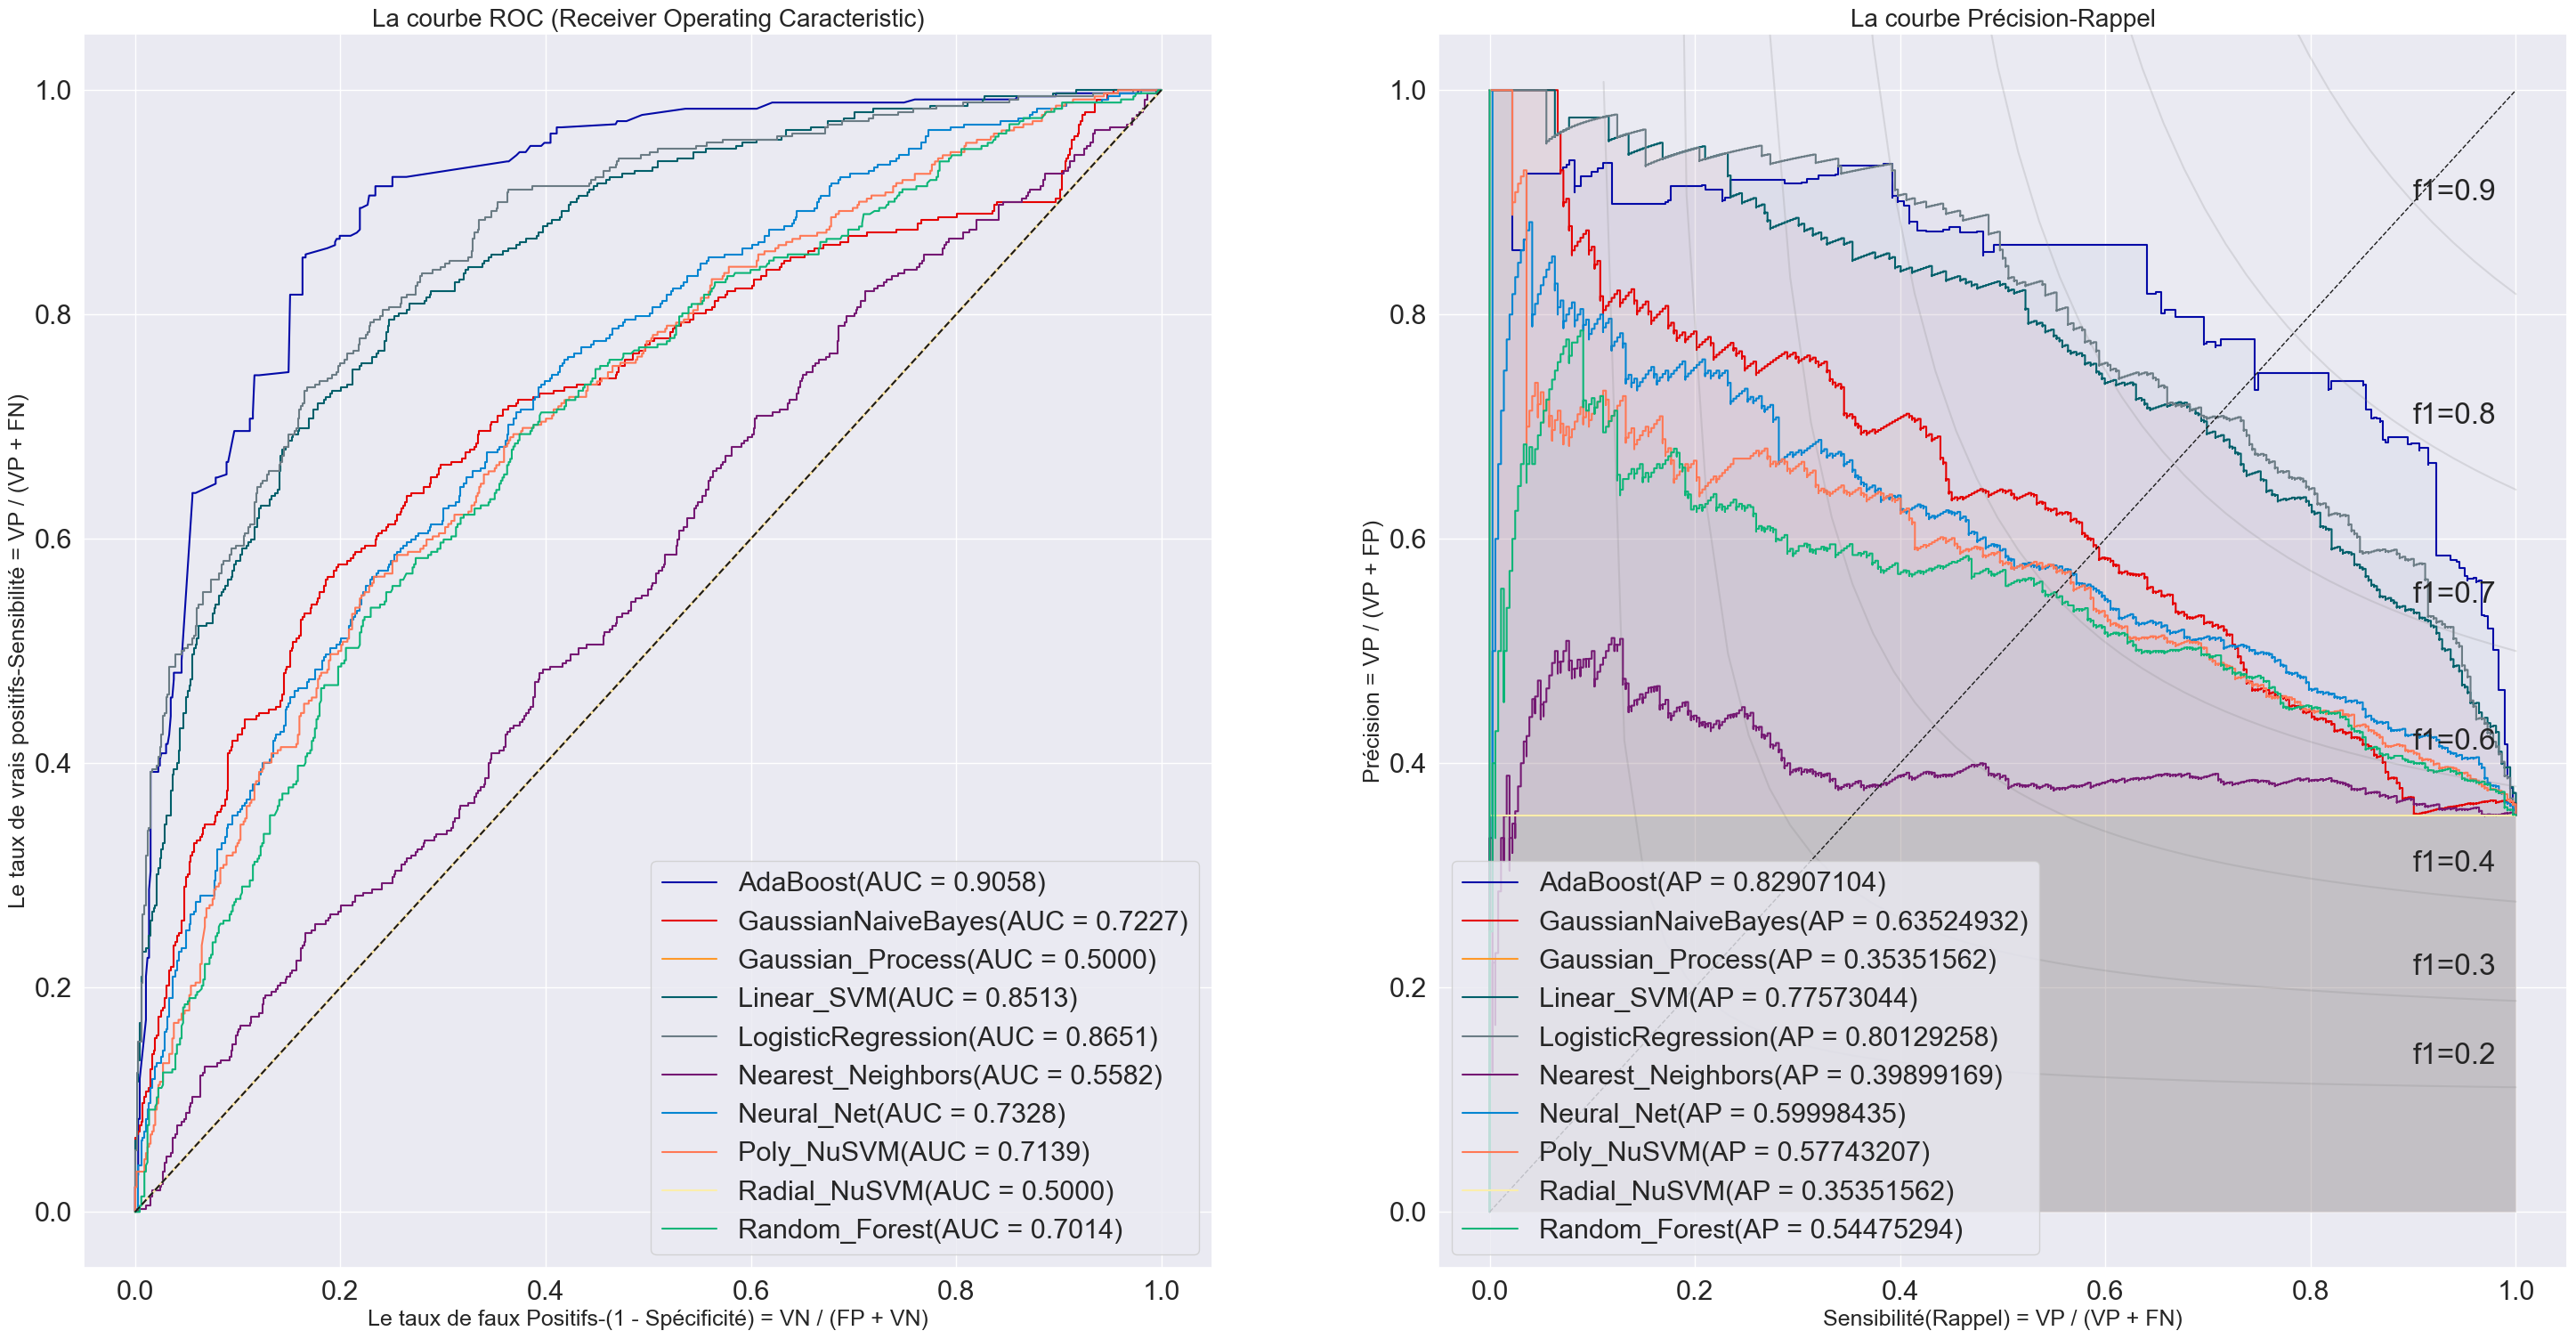

Exécution  :16.24s


In [162]:
resultatsTemp = executionEssaiComparaisonClassificateurs( classificateursDict=classificateursDict, 
                                                        X_train = X_train, 
                                                        y_train = y_train_categoricalDonnes,
                                                        X_test = X_test, 
                                                        y_test = y_test_categoricalDonnes, 
                                                        couleurs=palette[:len(classificateursDict.keys())],
                                                        nom_essai='STD Alzheimers Disease', 
                                                        projet=None)
resultats = pd.concat([resultatsTemp])

# <b><div style='padding:15px;background-color:#d8dcd6;color:#030aa7;font-size:120%;text-align: left'>Affichage des évolutions des métriques dans les essais</div></b> 

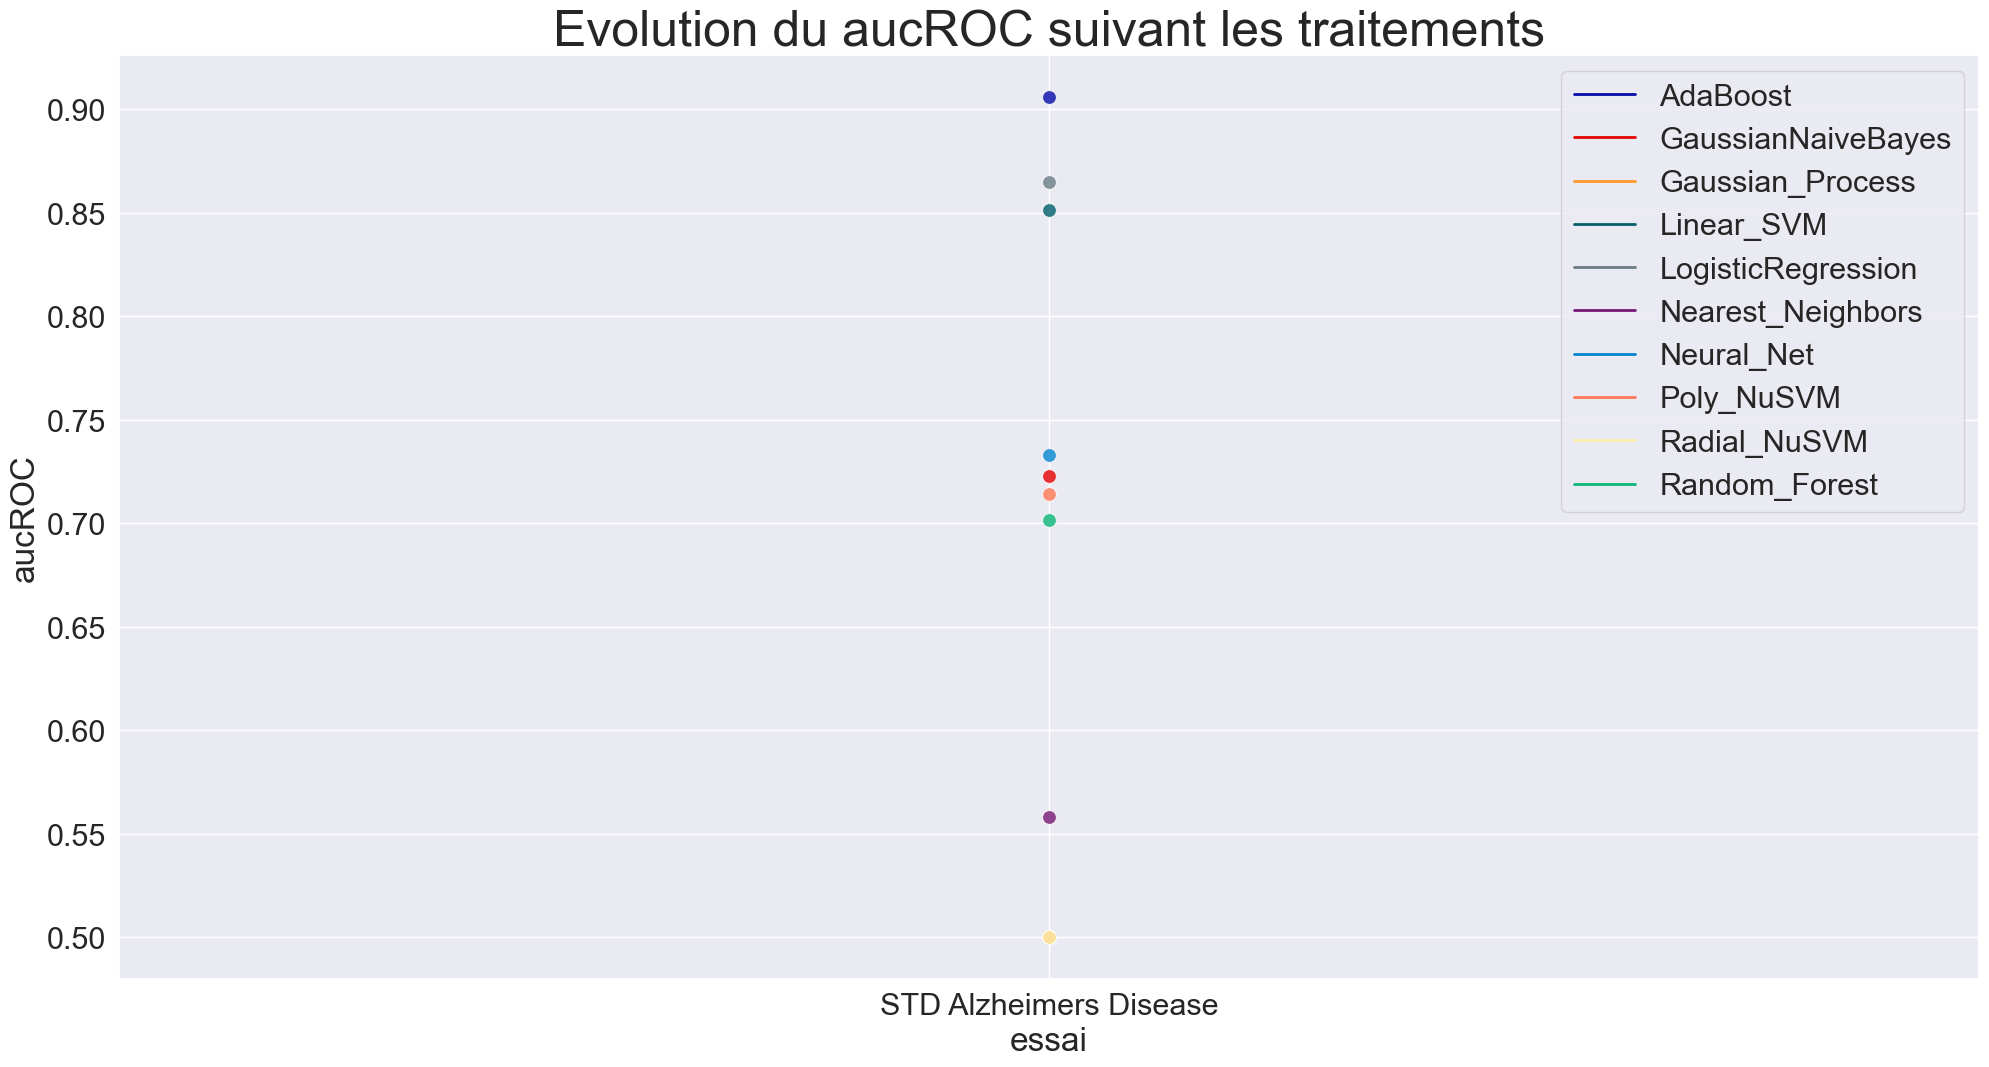

In [163]:
affichageEvolutionMetriques(resultats, metrique='aucROC', palette=palette)